In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys, glob
import numpy as np
from sklearn.model_selection import train_test_split

In [104]:
x_data = np.load("data/res_process/test1/data2/x_train.npy")
y = np.load("data/res_process/test1/data2/y_train.npy")
y_label = np.load("data/res_process/test1/data2/y_train_label.npy")

y_data = np.log(y)
#y_data = y_data-3.8

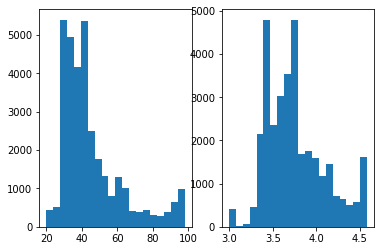

In [105]:
plt.subplot(1,2,1)
plt.hist(y, bins=20)
plt.subplot(1,2,2)
plt.hist(y_data, bins=20)
plt.show()

In [86]:
x_test = np.load("data/res_process/test1/data2/x_test.npy")
y_test = np.load("data/res_process/test1/data2/y_test.npy")
y_label_test = np.load("data/res_process/test1/data2/y_test_label.npy")

In [77]:
x_data.shape, x_test.shape, y_data.shape, y_label.shape

((33371, 625, 3), (905, 625, 3), (33371,), (33371,))

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=34)
_, _, y_train_label, y_valid_label = train_test_split(x_data, y_label, test_size=0.2, shuffle=True, random_state=34)


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=34)


In [109]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

def each_conv(x):
    y = layers.Conv1D(filters=20, kernel_size=2, padding='causal', activation='relu', dilation_rate=1)(x)
    y = layers.Conv1D(filters=20, kernel_size=2, padding='causal', activation='relu', dilation_rate=2)(y)
    y = layers.Conv1D(filters=20, kernel_size=2, padding='causal', activation='relu', dilation_rate=4)(y)
    y = layers.Conv1D(filters=20, kernel_size=2, padding='causal', activation='relu', dilation_rate=8)(y)

    y = layers.AveragePooling1D(50, padding='same')(y)
    y = layers.Conv1D(20, 100, padding='same', activation='relu')(y)

    y = layers.Conv1D(10, 100, padding='same', activation='relu')(y)
    y = layers.AveragePooling1D(100, padding='same')(y)
    y = layers.Reshape((10, ))(y)
    return y

def build_conv():
    
    x_list = []
    y_list = []
    
    for i in range(3):
        x = layers.Input(shape=(625,1))
        y = each_conv(x)
        x_list.append(x)
        y_list.append(y)
    
    y = layers.Concatenate()(y_list)
    y = layers.Dense(10, activation='relu')(y)
    y = layers.Dense(1)(y)
    
    return models.Model(x_list, y)

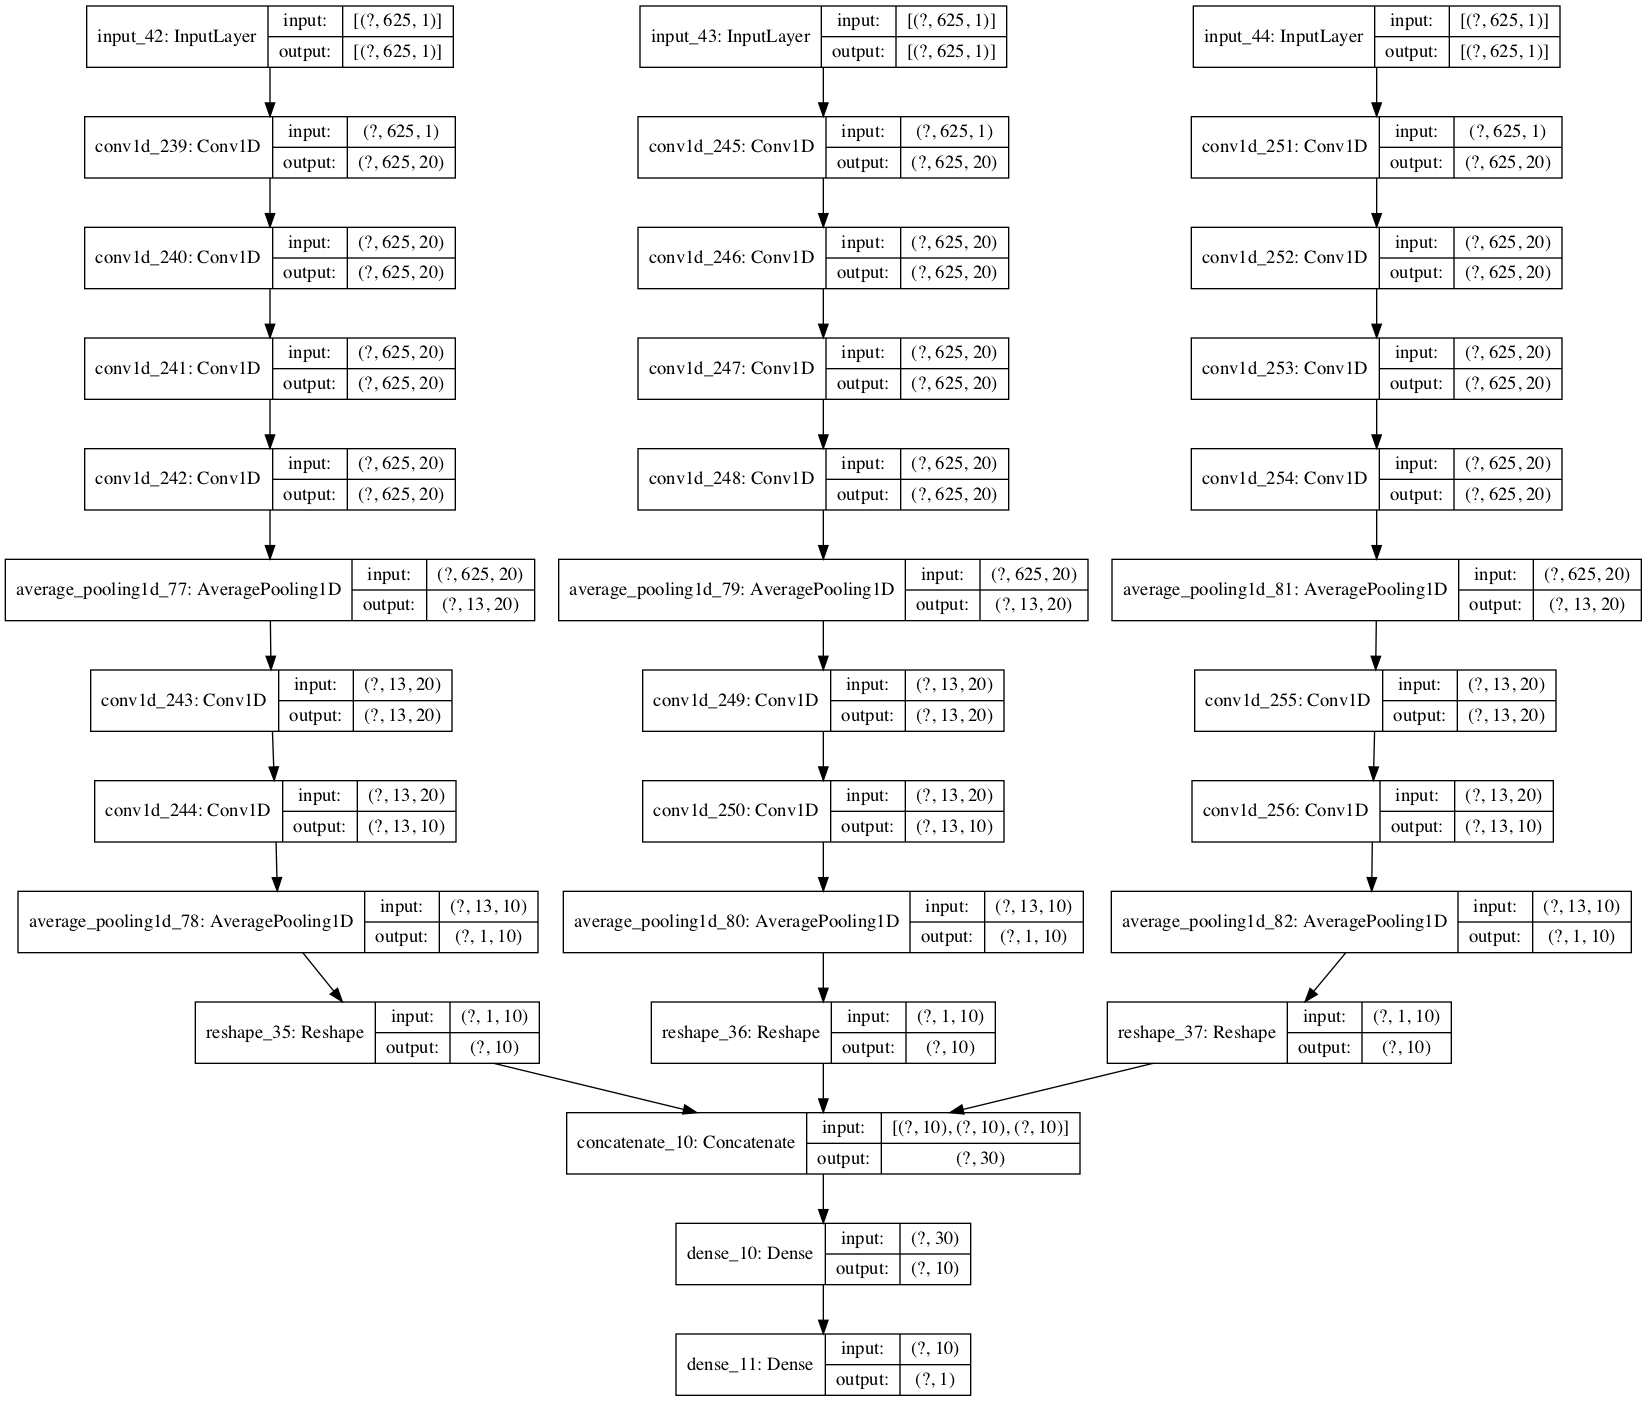

In [110]:
model = build_conv()
plot_model(model, show_shapes=True)

In [111]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
loss='mse'
model.compile(optimizer, loss, metrics=['mae', 'mse'])

In [112]:
x1 = np.expand_dims(x_train[:,:,0], 2)
x2 = np.expand_dims(x_train[:,:,1], 2)
x3 = np.expand_dims(x_train[:,:,2], 2)

v1 = np.expand_dims(x_valid[:,:,0], 2)
v2 = np.expand_dims(x_valid[:,:,1], 2)
v3 = np.expand_dims(x_valid[:,:,2], 2)

t1 = np.expand_dims(x_test[:,:,0], 2)
t2 = np.expand_dims(x_test[:,:,1], 2)
t3 = np.expand_dims(x_test[:,:,2], 2)

x1.shape, v1.shape, t1.shape

((26696, 625, 1), (6675, 625, 1), (905, 625, 1))

In [113]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
ckpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model2.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
model.fit([x1,x2,x3], y_train, validation_data=[[v1,v2,v3], y_valid], epochs=300,
         callbacks=[early_stop, ckpoint])

Train on 26696 samples, validate on 6675 samples
Epoch 1/300
26688/26696 [============================>.] - ETA: 0s - loss: 0.3054 - mae: 0.3633 - mse: 0.3054
Epoch 00001: val_loss improved from inf to 0.14542, saving model to model2.hdf5
26696/26696 [==============================] - 55s 2ms/sample - loss: 0.3053 - mae: 0.3633 - mse: 0.3053 - val_loss: 0.1454 - val_mae: 0.3098 - val_mse: 0.1454
Epoch 2/300
26688/26696 [============================>.] - ETA: 0s - loss: 0.0965 - mae: 0.2426 - mse: 0.0965
Epoch 00002: val_loss improved from 0.14542 to 0.06243, saving model to model2.hdf5
26696/26696 [==============================] - 54s 2ms/sample - loss: 0.0965 - mae: 0.2426 - mse: 0.0965 - val_loss: 0.0624 - val_mae: 0.1867 - val_mse: 0.0624
Epoch 3/300
26688/26696 [============================>.] - ETA: 0s - loss: 0.0752 - mae: 0.2107 - mse: 0.0752
Epoch 00003: val_loss did not improve from 0.06243
26696/26696 [==============================] - 63s 2ms/sample - loss: 0.0752 - mae: 0.

26688/26696 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1416 - mse: 0.0370- ETA: 0s - loss: 0.0370 - mae: 0.1416 - mse:
Epoch 00025: val_loss did not improve from 0.03609
26696/26696 [==============================] - 60s 2ms/sample - loss: 0.0370 - mae: 0.1416 - mse: 0.0370 - val_loss: 0.0482 - val_mae: 0.1654 - val_mse: 0.0482
Epoch 26/300
26688/26696 [============================>.] - ETA: 0s - loss: 0.0367 - mae: 0.1404 - mse: 0.0367
Epoch 00026: val_loss did not improve from 0.03609
26696/26696 [==============================] - 59s 2ms/sample - loss: 0.0367 - mae: 0.1404 - mse: 0.0367 - val_loss: 0.0673 - val_mae: 0.2097 - val_mse: 0.0673
Epoch 27/300
26688/26696 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1401 - mse: 0.0365
Epoch 00027: val_loss did not improve from 0.03609
26696/26696 [==============================] - 61s 2ms/sample - loss: 0.0365 - mae: 0.1401 - mse: 0.0365 - val_loss: 0.0469 - val_mae: 0.1646 - val_mse: 0.0469
Ep

In [102]:
y_pred = model.predict([t1, t2, t3])
y_pred = y_pred+3.8
y_pred = np.exp(y_pred)

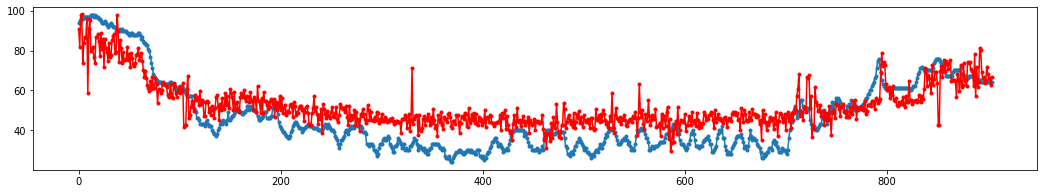

In [103]:
figure = plt.figure(figsize=(18,3))
plt.plot(y_test, marker='.')
plt.plot(y_pred, c='r', marker='.')

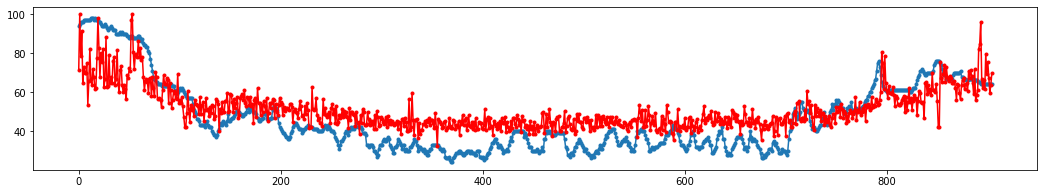

In [116]:
y_pred = model.predict([t1, t2, t3])
y_pred = np.exp(y_pred)
y_pred = np.clip(y_pred, 20, 100)
figure = plt.figure(figsize=(18,3))
plt.plot(y_test, marker='.')
plt.plot(y_pred, c='r', marker='.')